Overfitting phenomenon of the maximum likelihood
===============	

# Introduction

## Goals : illustrate the overfitting phenomenon of the variance estimator found by maximum likelihood
## Requirements : Knowledge on probabilities (see my notebook http://romain.raveaux.free.fr/document/NaiveBayesClassifier.html)

## Author : Romain Raveaux
## Reference : The key concepts are presented in Christopher Bishop Book titled "Pattern Recognition And Machine Learning" more precisely from the section 1.2.4



# We start with some important recalls


# Expectation
One of the most important operations involving probabilities is that of finding weighted averages of functions. The average value of some function $f(x)$ under a probability distribution $p(x)$ is called the expectation of $f(x)$ and will be denoted by
$\mathbb{E}[f]$. For a discrete distribution, it is given by
$$\mathbb{E}[f]=\sum_x p(x)f(x)  $$
so that the average is weighted by the relative probabilities of the different values
of x. $x$ can be a finite set i.e. $x=\{0,1 \}$

In either case, if we are given a finite number N of points drawn from the probability
distribution or probability density, then the expectation can be approximated as a
$$\mathbb{E}[f]\approx\frac{1}{N}  \sum_{i=1}^N f(x_i)$$
The approximation becomes exact in the limit $N\to \infty$

# Variance

The variance of $f(x)$ is defined by
$$var[x] = \mathbb{E}[(f(x)- \mathbb{E}[f])^2 ] $$

and provides a measure of how much variability there is in $f(x)$ around its mean
value $\mathbb{E}[f(x)]$.

# The Gaussian distribution
In particular, we can consider the distribution the variable $x$ itself, which is given by

$$Pr(x|\mu,\sigma^2) = \frac{1}{{\sqrt {2\pi \sigma^2 } }} \exp \{ \frac{- (x - \mu ))^2 }{2\sigma ^2}  \}=\mathcal{N}(x|\mu,\sigma^2)  $$
which is governed by two parameters: $\mu$, called the mean, and $\sigma^2$, called the variance.
The square root of the variance, given by $\sigma$, is called the standard deviation.

$$\mathbb{E}[x,\mathcal{N}(x|\mu,\sigma^2)]=\mu$$
$$var[x,\mathcal{N}(x|\mu,\sigma^2)]=\sigma^2$$
$$\mathbb{E}[x^2,\mathcal{N}(x|\mu,\sigma^2)]=\mu^2 +\sigma^2 $$


   # Probability of a data set
   
Now suppose that we have a data set of observations $\textbf{x} = (x_1, . . . , x_N)^T$, representing
$N$ observations of the scalar variable $x$. Note that we are using the boldface $\textbf{x}$.

Data points that are drawn independently from the same distribution are said to be
independent and identically distributed, which is often abbreviated to $i.i.d$. We have
seen that the joint probability of two independent events is given by the product of
the marginal probabilities for each event separately. Because our data set $\textbf{x}$ is i.i.d.,
we can therefore write the probability of the data set:

$$Pr(\textbf{x})=\prod_{i=1}^N Pr(x_i) $$

# Maximum Likelihood

As the name suggests, the maximum likelihood (ML) method finds the set of parameters $\hat{\theta}$
under which the data $\textbf{x} = (x_1, . . . , x_N)^T$ are most likely. To calculate the likelihood
function $Pr(x_i|\hat{\theta})$ at a single data point $x_i$, we simply evaluate the probability density
function at $x_i$. Assuming each data point was drawn independently from the
distribution, the likelihood function $Pr(\textbf{x}|\theta)$ for a set of points is the product
of the individual likelihoods. Hence, the ML estimate of the parameters is
$$\hat{\theta} =arg \max_{\theta} \{ \prod_{i=1}^N Pr(x_i| \theta)  \}   $$

# Goal : We want to show that maximum likelihood methodology suffer from the overfitting phenomena and under estimate the variance. 

# The methodology
1°) We create a data set that contains samples drawn independently from a Gaussian distribution whose mean $\mu$ and variance $\sigma^2$ that are unknown.

2°) we would like to determine these parameters ($\mu$ and $\sigma^2$) from the data set.

3°) We find the parameter values that maximize the likelihood function.

4°) We show that the variance is biased because the expectation of the variance estimator does not lead to $\sigma^2$

# Step by step

We suppose that the observations are drawn independently from a Gaussian distribution whose mean μ and variance σ2
are unknown we can therefore write the probability of the data set, given $\mu$ and $\sigma^2$, in the form
$$Pr(\textbf{x}|\mu,\sigma^2)=\prod_{i=1}^N Pr(x_i|\mu,\sigma^2) $$
The aforementioned equation is our likelihood function.

# The optimization problem

$$\hat{\mu},\hat{\sigma}^2 =arg \max_{\mu,\sigma^2 } \{ \prod_{i=1}^N Pr(x_i|\mu,\sigma^2)   \}   $$

# The solution 

In practice, it is more convenient to maximize the log of the likelihood function. Because the logarithm is a monotonically increasing function of its argument, maximization of the log of a function is equivalent to maximization of the function itself.
$$\ln Pr(\textbf{x}|\mu,\sigma^2)=\frac{-1}{2 \sigma^2} \sum_{i=1}^N (x_i-\mu)^2 - \frac{N}{2} \ln \sigma^2 - \frac{N}{2} \ln(2 \pi) $$

Maximizing with respect to $\mu$, we obtain the maximum likelihood solution given by
$$\hat{\mu}=\frac{1}{N}  \sum_{i=1}^N x_i$$

which is the sample mean, i.e., the mean of the observed values $\{x_i\}$. 

$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \mu}=0 $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \mu}=\sum_{i=1}^N (x_i-\mu)^2=0  $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \mu}=\sum_{i=1}^N x_i^2 -\sum_{i=1}^N 2x_i + \sum_{i=1}^N \mu^2   $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \mu}=-\sum_{i=1}^N 2x_i + 2N\mu   $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \mu}=-\sum_{i=1}^N 2x_i +2N\mu=0   $$
$$\hat{\mu}=\frac{1}{N}  \sum_{i=1}^N x_i$$
Similarly, maximizing with respect to $\sigma^2$, we obtain the maximum likelihood solution for the variance in the form
$$\hat{\sigma}^2=\frac{1}{N}  \sum_{i=1}^N (x_i - \hat{\mu} )^2 $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \sigma^2}=0 \text{     with   }  \frac{d \ln \sigma^2}{d \sigma^2}=\frac{1}{\sigma^2} \text{    and with  } \frac{d (1/\sigma^2)}{d \sigma^2} = \frac{-1}{\sigma^4} $$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \sigma^2}=\frac{1}{2\sigma^4} \sum_{i=1}^N (x_i-\mu)^2 -\frac{N}{2\sigma^2}=0$$

$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \sigma^2}=\frac{1}{2\sigma^4} \sum_{i=1}^N (x_i-\mu)^2 -\frac{N\sigma^2}{2\sigma^4}=0$$

$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \sigma^2}=\frac{1}{2\sigma^4}( \sum_{i=1}^N (x_i-\mu)^2 -N\sigma^2)=0$$
$$\frac{d \ln Pr(\textbf{x}|\mu,\sigma^2)}{d \sigma^2}=( \sum_{i=1}^N (x_i-\mu)^2 -N\sigma^2)=0$$


$$\hat{\sigma}^2=\frac{1}{N}  \sum_{i=1}^N (x_i - \hat{\mu} )^2 $$

which is the sample variance measured with respect to the sample mean $\hat{\mu}$. Note that we are performing a joint maximization with respect to $\mu$ and $\sigma^2$, but in the case of the Gaussian distribution the solution for $\mu$ decouples from that for $\sigma^2$ so that we can first evaluate $\hat{\mu}$ and then subsequently use this result to evaluate $\hat{\sigma}^2$

# Expectation of the estimates

We shall highlight the significant limitations of the maximum likelihood approach. Here we give an indication
of the problem in the context of our solutions for the maximum likelihood parameter settings for the univariate Gaussian distribution. In particular, we shall show that the maximum likelihood approach systematically underestimates the variance
of the distribution. This is an example of a phenomenon called bias and is related to the problem of over-fitting encountered in the context of polynomial curve fitting.
We first note that the maximum likelihood solutions $\hat{\mu}$ and $\hat{\sigma^2}$
ML are functions of the data set values $x_1, . . . , x_N$. Consider the expectations of these quantities with respect to the data set values, which themselves come from a Gaussian distribution with parameters $\mu$ and $\sigma^2$. It is straightforward to show that:
$$ \mathbb{E}[\hat{\mu}]=\mu$$
$$ \mathbb{E}[\hat{\sigma^2}]=\frac{N-1}{N}\sigma^2 $$


If $i = j$ then $x_ix_j$ = $x_i^2$ and we obtain $\mathbb{E}[x_i^2]= \mu^2 + \sigma^2$, whereas if
    $i \neq j$ then the two data points $x_i$ and $x_j$ are independent and hence $\mathbb{E}[x_i x_j]= \mathbb{E}[x_i]\mathbb{E}[x_j]=\mu^2$
$$ \mathbb{E}[\hat{\mu}]=\frac{1}{N}  \sum_{i=1}^N \mathbb{E}[x_i]=\frac{1}{N} N \mu= \mu$$
and,
$$ \mathbb{E}[\hat{\sigma^2}]= \mathbb{E}[\frac{1}{N} \sum_{i=1}^N (x_i - \frac{1}{N}  \sum_{j=1}^N x_j)^2 ]$$
$$ \mathbb{E}[\hat{\sigma^2}]= \mathbb{E}[\frac{1}{N} \sum_{i=1}^N (x_i^2 - \frac{2}{N} x_i  \sum_{j=1}^N x_j + \frac{1}{N^2} \sum_{j=1}^N \sum_{k=1}^N x_j x_k ) ]$$
$$ \mathbb{E}[\hat{\sigma^2}]= \frac{1}{N} \sum_{i=1}^N \mathbb{E}[ (x_i^2 - \frac{2}{N} x_i  \sum_{j=1}^N x_j + \frac{1}{N^2} \sum_{j=1}^N \sum_{k=1}^N x_j x_k )] $$
$$ \mathbb{E}[\hat{\sigma^2}]= \frac{1}{N} \sum_{i=1}^N  (\mathbb{E}[x_i^2] - \mathbb{E}[\frac{2}{N} x_i  \sum_{j=1}^N x_j] + \frac{1}{N^2} \mathbb{E}[\sum_{j=1}^N \sum_{k=1}^N x_j x_k ]) $$
$$ \mathbb{E}[\hat{\sigma^2}]= \frac{1}{N} \sum_{i=1}^N  (\mu^2+\sigma^2 - 2 (\mu^2 + \frac{1}{N}\sigma^2) + (\mu^2 + \frac{1}{N}\sigma^2)) $$
$$ \mathbb{E}[\hat{\sigma^2}]= \frac{N-1}{N} \sigma^2  $$
## Zoom on a part of the calculaes :
$$\mathbb{E}[\frac{2}{N} x_i  \sum_{j=1}^N x_j] = \frac{2}{N} \mathbb{E}[ \sum_{j=1}^N x_ix_j] =\mathbb{E}[ \sum_{j=1, \; j=i}^N x_i^2  + \sum_{j=1, \; j \neq i}^N x_ix_j ] $$
$$\mathbb{E}[\frac{2}{N} x_i  \sum_{j=1}^N x_j] = \frac{2}{N} (\mu^2  +\sigma^2 + (N-1) \mu^2) $$
$$\mathbb{E}[\frac{2}{N} x_i  \sum_{j=1}^N x_j] = \frac{2}{N} (  \sigma^2 + N \mu^2)= \frac{2}{N}  \sigma^2+ 2\mu^2 $$




# Conclusion 
So that on average the maximum likelihood estimate will obtain the correct mean but will underestimate the true variance by a factor $\frac{N − 1}{N}$. It follows that the following estimate for the variance parameter is unbiased : 

$$\overline{\sigma}^2 =\frac{N}{N-1} \hat{\sigma}^2 =\frac{1}{N-1} \sum_{i=1}^N (x_i - \hat{\mu})$$

# Code : biased and unbiased variance

In [33]:
import numpy as np
import matplotlib.pyplot as plt


Let us define the variance : The biased and the unbiased version

In [34]:
def biasedvariance(array,mean):
    res=0
    for val in array:
        var=((val-mean)*(val-mean))
        res=res+var
   
    N=array.shape[0]     
    res = res/N
    return res[0]

def unbiasedvariance(array,mean):
    res=0
    for val in array:
        var=((val-mean)*(val-mean))
        res=res+var
   
    N=array.shape[0]     
    res = res/(N-1)
    return res[0]


Let us define the Gaussian function : 

In [35]:
def gaussian(x, mean, var):
    num = -np.power(x - mean, 2.)
    denum = 2 * var
    factor = (np.sqrt(2*var*np.pi))
    res=np.exp(num/denum)
    res = res /factor
    return res


Let us draw a simple Gaussian

(120,)


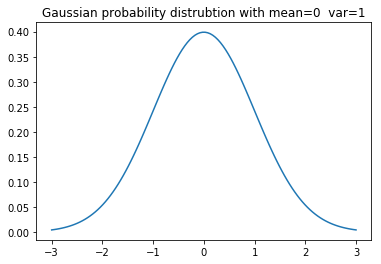

In [36]:
np.random.seed(10)
mean_original=0
var_original=1
std_original=1

#Creates the x axis 120 values between -3 and 3.
x_values = np.linspace(-3, 3, 120)
print(x_values.shape)

plt.figure(1)    
plt.title("Gaussian probability distrubtion with mean="+str(mean_original)+"  var="+str(var_original))
plt.plot(x_values, gaussian(np.array(x_values), mean_original, var_original))
plt.show()


Let us try to sample this distribution. We draw two samples only.

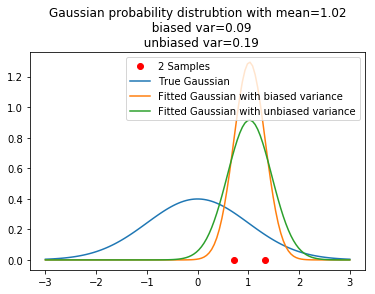

In [37]:
#First sampling : Sampling Gaussian distribution mea=0 and std=1
#Only 2 samples are drawn from the Gaussian distribution
x=np.random.normal(mean_original,std_original,(2,1))
mean1=np.mean(x)
biasedvar1=biasedvariance(x,mean1)
unbiasedvar1=unbiasedvariance(x,mean1)
plt.figure(2)    
plt.title("Gaussian probability distrubtion with mean="+"{0:.2f}".format(mean1)+"\n  biased var="+"{0:.2f}".format(biasedvar1) +"\n  unbiased var="+"{0:.2f}".format(unbiasedvar1))
plt.plot(x,[0,0],'ro')
plt.plot(x_values, gaussian(np.array(x_values), mean_original, var_original))
plt.plot(x_values, gaussian(np.array(x_values), mean1, biasedvar1))
plt.plot(x_values, gaussian(np.array(x_values), mean1, unbiasedvar1))
plt.legend(["2 Samples", "True Gaussian","Fitted Gaussian with biased variance", "Fitted Gaussian with unbiased variance"])
plt.show()


Let us try another attempt:



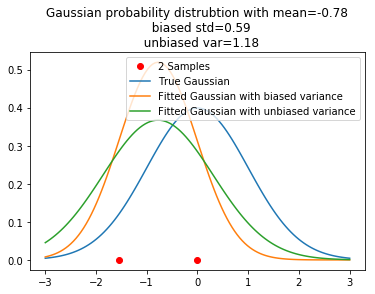

In [38]:
#Second sampling : Sampling Gaussian distribution mea=0 and std=1
#Only 2 samples are drawn from the Gaussian distribution
x=np.random.normal(mean_original,std_original,(2,1))
mean2=np.mean(x)
biasedvar2=biasedvariance(x,mean2)
unbiasedvar2=unbiasedvariance(x,mean2)
plt.figure(3)    
plt.title("Gaussian probability distrubtion with mean="+"{0:.2f}".format(mean2)+"\n  biased std="+"{0:.2f}".format(biasedvar2) +"\n  unbiased var="+"{0:.2f}".format(unbiasedvar2))
plt.plot(x,[0,0],'ro')
plt.plot(x_values, gaussian(np.array(x_values), mean_original, var_original))
plt.plot(x_values, gaussian(np.array(x_values), mean2, biasedvar2))
plt.plot(x_values, gaussian(np.array(x_values), mean2, unbiasedvar2))
plt.legend(["2 Samples", "True Gaussian","Fitted Gaussian with biased variance", "Fitted Gaussian with unbiased variance"])
plt.show()


And a last one : 

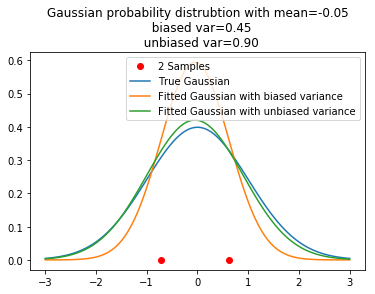

In [39]:
#Third sampling : Sampling Gaussian distribution mea=0 and std=1
#Only 2 samples are drawn from the Gaussian distribution
x=np.random.normal(mean_original,std_original,(2,1))
mean3=np.mean(x)
biasedvar3=biasedvariance(x,mean3)
unbiasedvar3=unbiasedvariance(x,mean3)
plt.figure(4)    
plt.title("Gaussian probability distrubtion with mean="+"{0:.2f}".format(mean3)+"\n  biased var="+"{0:.2f}".format(biasedvar3) +"\n  unbiased var="+"{0:.2f}".format(unbiasedvar3))
plt.plot(x,[0,0],'ro')
plt.plot(x_values, gaussian(np.array(x_values), mean_original, std_original))
plt.plot(x_values, gaussian(np.array(x_values), mean3, biasedvar3))
plt.plot(x_values, gaussian(np.array(x_values), mean3, unbiasedvar3))
plt.legend(["2 Samples", "True Gaussian","Fitted Gaussian with biased variance", "Fitted Gaussian with unbiased variance"])
plt.show()

Some statistics on standard deviation:

In [40]:
biasedvar=np.array([biasedvar1,biasedvar2,biasedvar3])
unbiasedvar=np.array([unbiasedvar1,unbiasedvar2,unbiasedvar3])

print("Biased var mean=",biasedstd.mean())
print("Unbiased var mean=",unbiasedstd.mean())


Biased var mean= 0.1836570089095361
Unbiased var mean= 0.3673140178190722


### The unbiased variance is closer than the biased variance to the real one that is set to 1.